In [48]:
# Imports die tot nu toe worden gebruikt
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [49]:
# Initialiseren van maindir en folders. Update maindir naar eigen dir waar de folders staan die hieronder staan
dirJelle = r'C:\Users\Jelle\Downloads\NLST\NLST'
maindir = dirJelle
folders = [r'\imagesTr', r'\keypointsTr', r'\masksTr']

In [50]:
# Het inladen van 1 image
t1_fn = maindir + folders[0] + r'\NLST_0001_0000.nii'

# Read the .nii image containing the volume with SimpleITK:
raw_img = sitk.ReadImage(t1_fn)

# and access the numpy array:
raw_np = sitk.GetArrayFromImage(raw_img)

# Print image information
print(f"image size: {raw_img.GetSize()}")
print(f"image origin: {raw_img.GetOrigin()}")
print(f"image spacing: {raw_img.GetSpacing()}")
print(f"image width: {raw_img.GetWidth()}")
print(f"image height: {raw_img.GetHeight()}")
print(f"image depth: {raw_img.GetDepth()}")


image size: (224, 192, 224)
image origin: (0.0, 0.0, 0.0)
image spacing: (1.5, 1.5, 1.5)
image width: 224
image height: 192
image depth: 224


Text(0.5, 1.0, 'raw data')

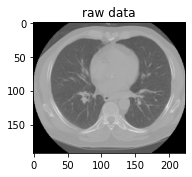

In [51]:
# Hier plot ik een slice van de CT, verander de waarde van 'x' in raw_np[x] bij plt.imshow
plt.subplot(1,2,1)
plt.imshow(raw_np[100], cmap="gray")
plt.title("raw data")

In [52]:
def load_nii_files(directory, description):
    nii_files = []

    # Print the directory
    print(f"Listing files in directory: {directory}")

    # Get the list of files in the directory
    file_list = os.listdir(directory)

    # Wrap the file list with tqdm for progress bar
    for filename in tqdm(file_list, desc=description, unit="file"):
        # Check if the file has a .nii.gz extension
        if filename.endswith(".nii.gz"):
            # Load the file using SimpleITK
            file_path = os.path.join(directory, filename)
            nii_file = sitk.ReadImage(file_path)
            nii_files.append(nii_file)

    return nii_files

def load_csv_files(directory):
    csv_files = []

    # Print the directory
    print(f"Listing files in directory: {directory}")

    # Get the list of files in the directory
    file_list = os.listdir(directory)

    # Wrap the file list with tqdm for progress bar
    for filename in tqdm(file_list, desc="Loading keypoints", unit="file"):
        # Check if the file has a .csv extension
        if filename.endswith(".csv"):
            # Load the file using pandas
            file_path = os.path.join(directory, filename)
            csv_file = pd.read_csv(file_path)
            csv_files.append(csv_file)

    return csv_files




In [55]:
# Usage example
nii_directory = maindir+folders[0]
images = load_nii_files(nii_directory, 'Loading images')

# Check if any files were loaded
if len(images) == 0:
    print("No .nii.gz images were loaded.")
else:
    print(f"Loaded {len(images)} .nii.gz images.")

nii_directory = maindir+folders[2]
masks = load_nii_files(nii_directory, 'Loading masks')

# Check if any files were loaded
if len(masks) == 0:
    print("No .nii.gz masks were loaded.")
else:
    print(f"Loaded {len(masks)} .nii.gz masks.")

# Usage example
csv_directory = maindir+folders[1]
keypoints = load_csv_files(csv_directory)

# Check if any files were loaded
if len(keypoints) == 0:
    print("No .csv files were loaded.")
else:
    print(f"Loaded {len(keypoints)} .csv files.")


Listing files in directory: C:\Users\Jelle\Downloads\NLST\NLST\imagesTr


Loading images: 100%|██████████| 220/220 [00:42<00:00,  5.21file/s]


Loaded 220 .nii.gz images.
Listing files in directory: C:\Users\Jelle\Downloads\NLST\NLST\masksTr


Loading masks: 100%|██████████| 220/220 [00:07<00:00, 30.93file/s]


Loaded 220 .nii.gz masks.
Listing files in directory: C:\Users\Jelle\Downloads\NLST\NLST\keypointsTr


Loading keypoints: 100%|██████████| 200/200 [00:00<00:00, 262.70file/s]

Loaded 200 .csv files.
